# BTS 자료분석
> Best Trip Service
> (원자료) 국민여행조사_국내여행

- 이전 원자료 수정 작업
- 결측치가 많은정보 제거 (2일차 이후의 여행정보 제거)
- 해석하기 어려운 데이터 제거 (여행자의 올해 여행 정보)
- 불필요한 데이터 제거 (여행을 가지 않은 이유)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [54]:
data = pd.read_csv('(원자료) 2020년 국민여행조사_국내여행.csv',index_col='ID')


In [55]:
#data

In [56]:
d11 = data['A11']>4
d12 = data['A12']>4
d13 = data['A13']>4

data['total'] = d11 + d12 +d13
data['total'] = data['total'].map({True:1,False:0})

data.drop(['A11'], axis=1, inplace= True)
data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

data.drop(['WT_DOM'],axis=1, inplace=True)

In [57]:
data = data[data['D_TRA1_CHECK']=='Y']
data = data[data['D_TRA1_CASE']==1]

In [58]:
spot = data['D_TRA1_1_SPOT']

In [59]:
data.shape

(10638, 54)

# 결측치 처리

In [60]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

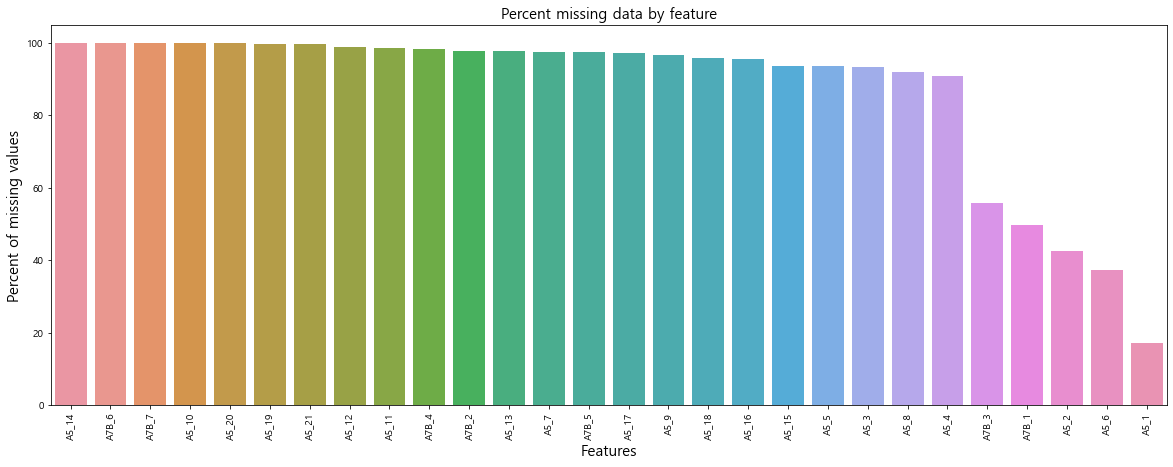

In [61]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [62]:
# 여행활동 이진 변수로 변경
for i in range(21):
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].fillna(0)
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].map({i+1:1,0:0})
# 여행 동반자 유형
for i in range(7):
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].fillna(0)
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].map({i+1:1,0:0})

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 11080760641_204453 to 3902057133A_260717
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   D_TRA1_CHECK     10638 non-null  object 
 1   D_TRA1_CASE      10638 non-null  float64
 2   D_TRA1_SMONTH    10638 non-null  float64
 3   D_TRA1_SDAY      10638 non-null  float64
 4   D_TRA1_EMONTH    10638 non-null  float64
 5   D_TRA1_EDAY      10638 non-null  float64
 6   D_TRA1_S_Day     10638 non-null  float64
 7   D_TRA1_COST      10638 non-null  float64
 8   D_TRA1_NUM       10638 non-null  float64
 9   D_TRA1_ONE_COST  10638 non-null  float64
 10  D_TRA1_1_SPOT    10638 non-null  float64
 11  A1_1             10638 non-null  int64  
 12  A4_1             10638 non-null  int64  
 13  A5_1             10638 non-null  int64  
 14  A5_2             10638 non-null  int64  
 15  A5_3             10638 non-null  int64  
 16  A5_4             10638 non-null  

In [64]:
data

,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,BSEX,BAGE,SAGE,BJOB,BINC1,BEDU,BMAR,BFAM,BMON,total
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,Y,1.0,8.0,9.0,8.0,9.0,0.0,40000.0,1.0,40000.0,...,1,4,45,1,5,3,2,3,8,0
21110610901_148196,Y,1.0,6.0,22.0,6.0,23.0,1.0,90000.0,1.0,90000.0,...,1,2,25,1,2,4,1,1,6,0
2231011065A_7203,Y,1.0,1.0,17.0,1.0,17.0,0.0,90000.0,3.0,30000.0,...,2,5,53,11,5,3,2,3,1,0
2302055001A_181404,Y,1.0,7.0,25.0,7.0,25.0,0.0,21000.0,2.0,22000.0,...,1,3,35,1,4,4,2,2,7,0
2305060097A_38902,Y,1.0,2.0,29.0,2.0,29.0,0.0,40000.0,2.0,20000.0,...,2,1,19,12,7,3,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,Y,1.0,4.0,18.0,4.0,18.0,0.0,150000.0,4.0,37500.0,...,1,3,38,1,5,4,2,3,4,1
3901054306A_172336,Y,1.0,6.0,28.0,6.0,28.0,0.0,30000.0,2.0,15000.0,...,2,3,35,1,6,4,2,2,6,1
39010631871_142345,Y,1.0,2.0,21.0,2.0,21.0,0.0,20000.0,1.0,20000.0,...,1,4,41,1,4,4,2,3,2,1


# 변수 분류

In [65]:
for i in data:
    print(f'"{i}",')

"D_TRA1_CHECK",
"D_TRA1_CASE",
"D_TRA1_SMONTH",
"D_TRA1_SDAY",
"D_TRA1_EMONTH",
"D_TRA1_EDAY",
"D_TRA1_S_Day",
"D_TRA1_COST",
"D_TRA1_NUM",
"D_TRA1_ONE_COST",
"D_TRA1_1_SPOT",
"A1_1",
"A4_1",
"A5_1",
"A5_2",
"A5_3",
"A5_4",
"A5_5",
"A5_6",
"A5_7",
"A5_8",
"A5_9",
"A5_10",
"A5_11",
"A5_12",
"A5_13",
"A5_14",
"A5_15",
"A5_16",
"A5_17",
"A5_18",
"A5_19",
"A5_20",
"A5_21",
"A7",
"A7B_1",
"A7B_2",
"A7B_3",
"A7B_4",
"A7B_5",
"A7B_6",
"A7B_7",
"A9",
"NA9",
"BSEX",
"BAGE",
"SAGE",
"BJOB",
"BINC1",
"BEDU",
"BMAR",
"BFAM",
"BMON",
"total",


In [66]:
numeric = [
    "D_TRA1_COST","D_TRA1_NUM","D_TRA1_ONE_COST","A7", "A9", "NA9", 
]


In [68]:
nominal = [
    "D_TRA1_CHECK","D_TRA1_CASE","D_TRA1_SMONTH","D_TRA1_EMONTH", 
    "D_TRA1_EDAY", "D_TRA1_S_Day","D_TRA1_1_SPOT","A1_1", "A4_1", 
    "BSEX", "BAGE", "SAGE", "BJOB", "BINC1", "BEDU", 
    "BMAR", "BFAM", "BMON",
]
# 명목형 변수 인코딩
for col in nominal:
    data[col] = data[col].apply(str)

In [69]:
binary = [
    "A5_1", "A5_2", "A5_3", "A5_4", "A5_5", "A5_6", "A5_7", "A5_8",
    "A5_9", "A5_10", "A5_11", "A5_12", "A5_13", "A5_14", "A5_15",
    "A5_16", "A5_17","A5_18", "A5_19", "A5_20", "A5_21", "A7B_1",
    "A7B_2", "A7B_3", "A7B_4", "A7B_5", "A7B_6", "A7B_7",
]

Text(0, 0.5, 'count')

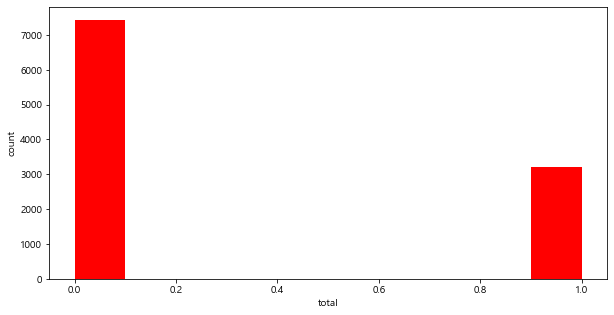

In [70]:
plt.figure(figsize=(10,5))
plt.hist(data['total'],color='red')
plt.xlabel('total')
plt.ylabel('count')

In [71]:
data.corr()['total'].sort_values().head(20)

A7B_3         -0.032198
D_TRA1_NUM    -0.013279
D_TRA1_SDAY   -0.012209
A7B_5         -0.005310
A5_19         -0.005102
A5_10         -0.004791
A5_13         -0.003569
A7B_7         -0.002171
A5_18         -0.002040
A7B_4         -0.001981
A5_16          0.000615
A5_14          0.001170
A7B_6          0.001170
A5_12          0.001784
A5_21          0.002581
A5_20          0.003098
A5_17          0.004159
A7B_2          0.005363
A7             0.019284
A5_11          0.029978
Name: total, dtype: float64

In [72]:
feature = []

연속형 변수
- 피어슨 상관 계수
연속형 변수 2개의 상관 관계를 확인하기 위한 가장 기본적인 방법이다.
정확히 말해서 두개의 수치값들의 집합이 있을 때 이 두개의 수치값들은 각각의 순서쌍에 대해서 연결관계가 있다고 할 때 두 수치값이 서로 관련이 있는지를 확인하는 방법이다.

흔한 예로 있는 것이 고등학생 한 학급에 50명이 있다고 할 때 이 학생들의 수학과목의 성적과 물리과목의 성정이 관련이 있는지 확인하는 것이 있다. 즉 수학과목과 물리과목은 서로 수리적 또는 과학적 능력과 관련이 있어 두 과목은 서로 관련이 있을 것이라는 가설을 어느 정도 두고 있으며 실제로 그런지 확인한다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://intothedata.com/02.scholar_category/statistics/correlation/

https://bskyvision.com/754

In [73]:
from scipy import stats
for i in numeric:
    corr, pval = stats.pearsonr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

D_TRA1_COST 9.474000129399422e-33
D_TRA1_ONE_COST 1.6933378081462536e-45
A7 0.046713725063188376
A9 5.806065291753125e-41
NA9 4.915744547278217e-44


이진 변수
- 점 양분 상관 계수
한 변수는 있음/없음, 네/아니오 등으로 이분형(binary) 이고, 다른 한 변수는 연속형인 경우에도 상관계수를 구할 수 있습니다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://mansoostat.tistory.com/115

In [74]:
from scipy.stats import pointbiserialr
for i in binary:
    corr, pval = pointbiserialr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

A5_1 1.057237106327922e-11
A5_2 9.9742406536892e-13
A5_3 4.101765010210948e-06
A5_4 0.0017944288532242554
A5_5 1.7163740105565753e-09
A5_6 2.106229489038291e-06
A5_7 7.602318634340863e-05
A5_8 5.837559867238211e-11
A5_9 1.8738388466212786e-05
A5_11 0.00198598747834124
A5_15 2.724686219829359e-18
A7B_1 0.00010512246066139061
A7B_3 0.000895713806665898


명목형 변수 one-hot-encoding

In [75]:
nominal

obdata=pd.DataFrame()
for i in nominal:
    obdata[i]=data[i]

obdata = pd.get_dummies(obdata)

In [77]:
obfeature=[]
for i in obdata.dtypes.index:
    corr, pval = pointbiserialr(obdata[i],data['total'])
    if pval <0.05:
        print(i,'   ',pval)
        obfeature.append(i)

D_TRA1_SMONTH_11.0     0.01735733869767785
D_TRA1_SMONTH_12.0     0.0054730323478230205
D_TRA1_SMONTH_2.0     0.007648455664896542
D_TRA1_SMONTH_3.0     0.0018259433764854945
D_TRA1_SMONTH_5.0     0.015708811694387665
D_TRA1_SMONTH_7.0     0.0013022171121187323
D_TRA1_SMONTH_9.0     0.006696230149635847
D_TRA1_EMONTH_11.0     0.017185795421315785
D_TRA1_EMONTH_12.0     0.005780395472143677
D_TRA1_EMONTH_2.0     0.008529298225486101
D_TRA1_EMONTH_3.0     0.0018259433764854945
D_TRA1_EMONTH_5.0     0.014452485911991433
D_TRA1_EMONTH_7.0     0.0007168139363430157
D_TRA1_EMONTH_9.0     0.007015843333060279
D_TRA1_EDAY_11.0     0.005080760581567949
D_TRA1_EDAY_18.0     0.0012622173948728806
D_TRA1_EDAY_19.0     0.008238445360452627
D_TRA1_EDAY_2.0     0.016039965720289505
D_TRA1_EDAY_20.0     0.018217160152649067
D_TRA1_EDAY_26.0     0.03413640778362815
D_TRA1_EDAY_3.0     0.04748122978783938
D_TRA1_EDAY_30.0     0.00031130690892490617
D_TRA1_S_Day_0.0     3.877967828750545e-65
D_TRA1_S_Day

In [78]:
X=pd.DataFrame()
for i in feature:
    X[i] = data[i]
    
for i in obfeature:
    X[i] = obdata[i]
y = data['total']

C:\Users\rhkdg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [79]:
X.index

Index(['11080760641_204453', '21110610901_148196', '2231011065A_7203',
       '2302055001A_181404', '2305060097A_38902', '2402069106A_324336',
       '25030560931_97381', '2504054317A_125174', '2504061032A_11754',
       '2504061032A_11785',
       ...
       '38360420481_344130', '38380360191_111885', '38390110071_141400',
       '3901052184A_142569', '3901052184A_56268', '3901053052A_112093',
       '3901054306A_172336', '39010631871_142345', '39020520031_345686',
       '3902057133A_260717'],
      dtype='object', name='ID', length=10638)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in X.dtypes.index:
    X[i] = scaler.fit_transform(pd.DataFrame(X[i]))

In [81]:
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import StratifiedKFold

In [82]:
skf = StratifiedKFold(n_splits= 5 , shuffle= True, random_state=0)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
'''
Statsmodels 패키지는 검정 및 추정(test and estimation), 회귀분석(regression analysis), 
시계열 분석(time - series analysis) 등의 기능을 제공하는 파이썬 패키지이다.
'''

log_reg = LogisticRegression()

log_reg.fit(X, y)
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())

print(f'score : {cross_val_score(log_reg, X, y, cv=skf).mean()}')

C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     9.492
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          2.23e-154
Time:                        09:46:50   Log-Likelihood:                -6264.8
No. Observations:               10638   AIC:                         1.277e+04
Df Residuals:                   10518   BIC:                         1.364e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

score : 0.7147947199825296
